In [5]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from preprocess import * 
import xgboost
import umap
import umap.plot
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv(os.path.join("data", "train.csv"))
train_data.dropna(inplace=True)

In [7]:
import ast

data = []
for p in range(6):
    total_amenities = []
    df = train_data[train_data['price'] == p]
    for amenity_list in df["amenities"]: 
        total_amenities += ast.literal_eval(amenity_list)
    data.append(total_amenities)
    
import nltk
from collections import Counter
# nltk.download('punkt')
# nltk.download('words')
# nltk.download('stopwords')

from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords

all_dicts = [Counter(amen) for amen in data]

# Combine all word counts
combined_counts = Counter()
for d in all_dicts:
    combined_counts.update(d)

# Analyze frequency differences to find distinctive words
distinctive_words = {i: [] for i in range(1, len(all_dicts) + 1)}

for word in combined_counts:
    counts = [d.get(word, 0) for d in all_dicts]
    max_count = max(counts)
    if counts.count(max_count) == 1:  # Word is most frequent in only one dictionary
        source_index = counts.index(max_count)
        distinctive_words[source_index + 1].append(word)

out = [] 
# Print the distinctive words for each source
for source, words in distinctive_words.items():
    print(f"Source {source}: {words[:]}")
    out += words[:50]

Source 1: ['Stove', 'Iron', 'Smoking allowed', 'Microwave', 'Luggage dropoff allowed', 'Bed linens', 'First aid kit', 'Essentials', 'Refrigerator', 'Shower gel', 'Fire extinguisher', 'Dryer', 'Hot water', 'Oven', 'Free street parking', 'Long term stays allowed', 'Washer', 'Backyard', 'Shampoo', 'Kitchen', 'Wifi', 'Dishes and silverware', 'Coffee maker', 'Cooking basics', 'Hangers', 'Hair dryer', 'Heating', 'Carbon monoxide alarm', 'Air conditioning', 'Lock on bedroom door', 'Lockbox', 'Smoke alarm', 'Dedicated workspace', 'Free parking on premises', 'Self check-in', 'Security cameras on property', 'Clothing storage: closet and dresser', 'Shared patio or balcony', 'Private entrance', 'Rice maker', 'Paid washer – In building', 'Clothing storage', 'TV', 'Private living room', 'Keypad', 'Portable fans', 'Gas stove', 'Single level home', 'Ceiling fan', 'Laundromat nearby', 'Paid parking off premises', 'Mini fridge', 'Shared pool', 'Safe', 'Clothing storage: walk-in closet', '50" HDTV with R

In [9]:
print(out)

['Stove', 'Iron', 'Smoking allowed', 'Microwave', 'Luggage dropoff allowed', 'Bed linens', 'First aid kit', 'Essentials', 'Refrigerator', 'Shower gel', 'Fire extinguisher', 'Dryer', 'Hot water', 'Oven', 'Free street parking', 'Long term stays allowed', 'Washer', 'Backyard', 'Shampoo', 'Kitchen', 'Wifi', 'Dishes and silverware', 'Coffee maker', 'Cooking basics', 'Hangers', 'Hair dryer', 'Heating', 'Carbon monoxide alarm', 'Air conditioning', 'Lock on bedroom door', 'Lockbox', 'Smoke alarm', 'Dedicated workspace', 'Free parking on premises', 'Self check-in', 'Security cameras on property', 'Clothing storage: closet and dresser', 'Shared patio or balcony', 'Private entrance', 'Rice maker', 'Paid washer – In building', 'Clothing storage', 'TV', 'Private living room', 'Keypad', 'Portable fans', 'Gas stove', 'Single level home', 'Ceiling fan', 'Laundromat nearby', 'Paid parking on premises', 'Elevator', 'Coffee maker: Keurig coffee machine', 'Patio or balcony', 'Gym', 'Shared hot tub', 'Exer

In [2]:
train_data = preprocess(train_data) 

NameError: name 'data' is not defined

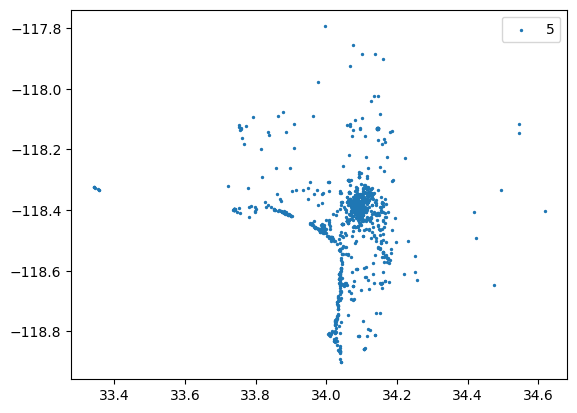

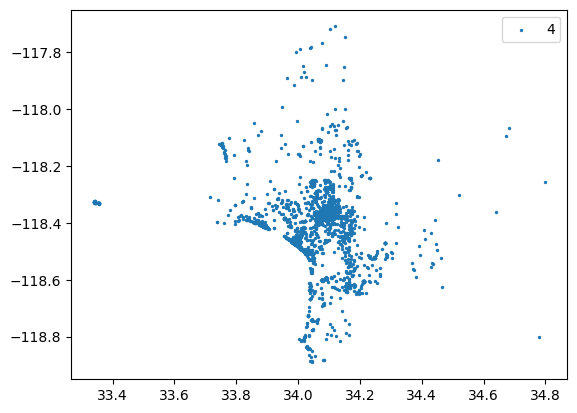

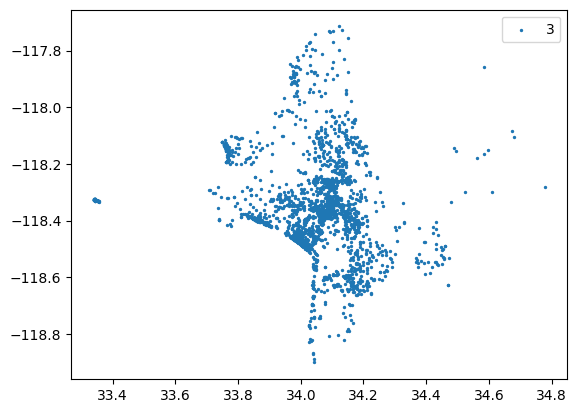

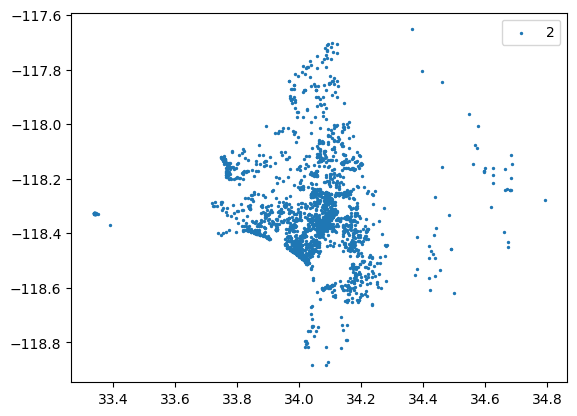

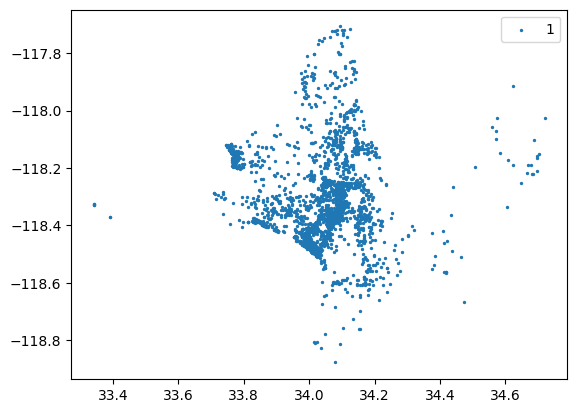

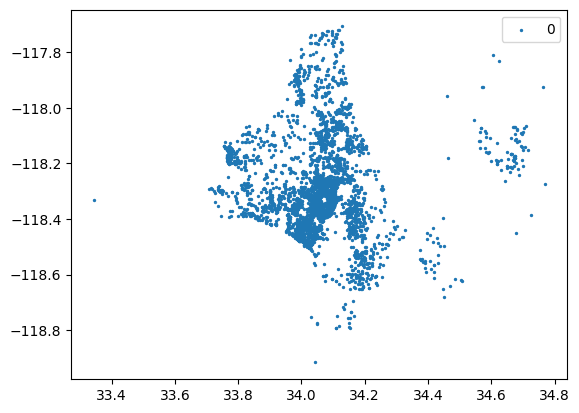

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

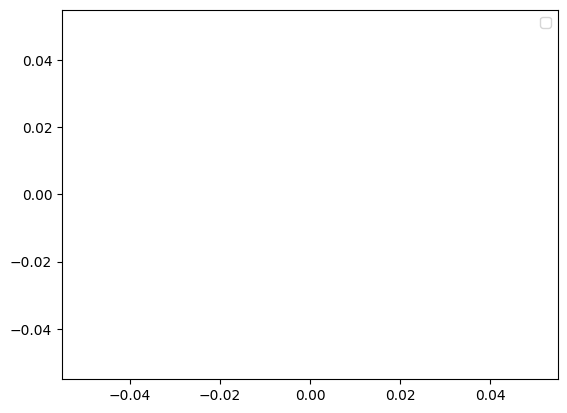

In [29]:
for p in range(5, -1, -1): 
    df = train_data[train_data['price'] == p]
    plt.scatter(df["latitude"], df["longitude"], s=2, label=f"{p}")
    plt.legend()
    plt.show()
plt.legend()

plt.plot()

In [11]:
data_info = train_data.info()

# Checking for columns with high correlation with the 'price' column
correlation = train_data.corr()['price'].sort_values(ascending=False)

# Displaying the summary information and the correlation values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_info, correlation)



<class 'pandas.core.frame.DataFrame'>
Index: 14675 entries, 0 to 15440
Columns: 229 entries, host_id to Unincorporated Areas
dtypes: bool(7), float64(10), int64(208), object(4)
memory usage: 25.6+ MB
None price                                                                                                      1.000000
num_bedroom                                                                                                0.590405
accommodates                                                                                               0.574787
num_baths                                                                                                  0.567370
beds                                                                                                       0.503730
Entire home/apt                                                                                            0.273548
amen_Private hot tub                                                                               